# Importing the required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from scipy.sparse import hstack
from tqdm import tqdm
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# 1.1 Loading the already preprocessed Data


In [ ]:
import pandas as pd
data = pd.read_csv('preprocessed_data.csv')

<h1>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h1>


In [ ]:
# Splitting the data into train and test dataset
y = data['project_is_approved']                                 # Storing the y-values separately from the data
data.drop(['project_is_approved'],axis=1, inplace=True)         # removing the y-value column from the data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data,y, test_size=0.30 ,stratify=y)

<h1>1.3 Make Data Model Ready: encoding essay</h1>

### 1.3.1 BoW encoding

In [ ]:
# Initialise the vectorizer with the best hyperparameters i.e. ngram_range=(1,1), max_features=15k
bow = CountVectorizer(ngram_range=(1,1), max_features=15000)
bow.fit(X_train['essay'].values)

# Transform the essay-feature after fitting a BoW Vectorizer
X_train_essay_bow = bow.transform(X_train['essay'].values)
X_test_essay_bow = bow.transform(X_test['essay'].values)


print("After Vectorizations: ")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)
print('='*100)

After Vectorizations: 
(76473, 15000) (76473,)
(32775, 15000) (32775,)


### 1.3.2 TF-IDF encoding 

In [ ]:
# Initialise the vectorizer with the best hyperparameters i.e. ngram_range=(1,2), max_features=75k
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=75000)
tfidf.fit(X_train['essay'].values)

# Transform the train and test dataset 
X_train_essay_tfidf = tfidf.transform(X_train['essay'].values)
X_test_essay_tfidf = tfidf.transform(X_test['essay'].values)


print("After Vectorizations: ")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print('='*100)

After Vectorizations: 
(76473, 75000) (76473,)
(32775, 75000) (32775,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

### 1.4.1 encoding numerical features: price(Normalizing)

In [ ]:
norm = Normalizer()
norm.fit(X_train['price'].values.reshape(1,-1))

# Changing the shape so that the normalization happens for all the samples and not for a individual sample
X_train_price_norm = norm.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = norm.transform(X_test['price'].values.reshape(1,-1))

# Re-changing the shape so as to have one column and as many rows as the number of data_points 
X_train_price_norm = X_train_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)

print("After Vectorizations: ")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print('='*100)

After Vectorizations: 
(76473, 1) (76473,)
(32775, 1) (32775,)


### 1.4.2 encoding numerical features: teacher_number_of_previously_posted_projects(Normalizing)

In [ ]:
norm1 = Normalizer()
norm1.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))


X_train_tnoppp_norm = norm1.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_tnoppp_norm = norm1.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

# Reshaping the vectors
X_train_tnoppp_norm = X_train_tnoppp_norm.reshape(-1, 1)
X_test_tnoppp_norm = X_test_tnoppp_norm.reshape(-1, 1)

print("After Vectorizations: ")
print(X_train_tnoppp_norm.shape, y_train.shape)
print(X_test_tnoppp_norm.shape, y_test.shape)
print('='*100)

After Vectorizations: 
(76473, 1) (76473,)
(32775, 1) (32775,)


### 1.4.3 encoding categorical features : school_state(ohe)

In [ ]:
ss = CountVectorizer(binary=True)
ss.fit(X_train['school_state'].values)

X_train_ss_ohe = ss.transform(X_train['school_state'].values)
X_test_ss_ohe = ss.transform(X_test['school_state'].values)

print("After Vectorizations: ")
print(X_train_ss_ohe.shape, y_train.shape)
print(X_test_ss_ohe.shape, y_test.shape)
print('='*100)

After Vectorizations: 
(76473, 51) (76473,)
(32775, 51) (32775,)


### 1.4.4 encoding categorical features : teacher_prefix

In [ ]:
tp = CountVectorizer(binary=True)
tp.fit(X_train['teacher_prefix'].values)

X_train_tp_ohe = tp.transform(X_train['teacher_prefix'].values)
X_test_tp_ohe = tp.transform(X_test['teacher_prefix'].values)

print("After Vectorizations: ")
print(X_train_tp_ohe.shape, y_train.shape)
print(X_test_tp_ohe.shape, y_test.shape)
print('='*100)

After Vectorizations: 
(76473, 5) (76473,)
(32775, 5) (32775,)


### 1.4.5 encoding categorical features: project_grade_category

In [ ]:
pgc = CountVectorizer(binary=True)
pgc.fit(X_train['project_grade_category'].values)

X_train_pgc_ohe = pgc.transform(X_train['project_grade_category'].values)
X_test_pgc_ohe = pgc.transform(X_test['project_grade_category'].values)

print("After Vectorizations: ")
print(X_train_pgc_ohe.shape, y_train.shape)
print(X_test_pgc_ohe.shape, y_test.shape)
print('='*100)

After Vectorizations: 
(76473, 4) (76473,)
(32775, 4) (32775,)


### 1.4.6 encoding categorical features: clean_categories

In [ ]:
cc = CountVectorizer(binary=True)
cc.fit(X_train['clean_categories'].values)

X_train_cc_ohe = cc.transform(X_train['clean_categories'].values)
X_test_cc_ohe = cc.transform(X_test['clean_categories'].values)

print("After Vectorizations: ")
print(X_train_cc_ohe.shape, y_train.shape)
print(X_test_cc_ohe.shape, y_test.shape)
print('='*100)

After Vectorizations: 
(76473, 9) (76473,)
(32775, 9) (32775,)


### 1.4.7 encoding categorical features: clean_subcategories

In [ ]:
csc = CountVectorizer(binary=True)
csc.fit(X_train['clean_subcategories'].values)

X_train_csc_ohe = csc.transform(X_train['clean_subcategories'].values)
X_test_csc_ohe = csc.transform(X_test['clean_subcategories'].values)

print("After Vectorizations: ")
print(X_train_csc_ohe.shape, y_train.shape)
print(X_test_csc_ohe.shape, y_test.shape)
print('='*100)

After Vectorizations: 
(76473, 30) (76473,)
(32775, 30) (32775,)


<h2>1.5 Appling NB on different kind of featurization</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

## 1.5.1 Naive Bayes -  BoW_essay + Other features 

### 1.5.1.1 Find the best hyperparameter for the MutinomialNB

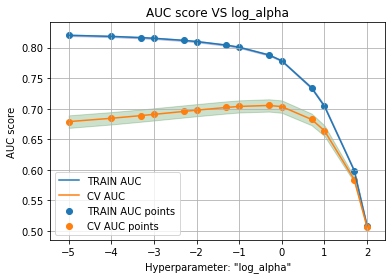

In [ ]:
# Stack all the train and test features into one variable and convert it to a sparse matrix 
X_tr = hstack((X_train_ss_ohe, X_train_tp_ohe, X_train_pgc_ohe, X_train_tnoppp_norm, X_train_cc_ohe, X_train_csc_ohe,X_train_essay_bow, X_train_price_norm)).tocsr()
X_te = hstack((X_test_ss_ohe, X_test_tp_ohe, X_test_pgc_ohe, X_test_tnoppp_norm, X_test_cc_ohe, X_test_csc_ohe,X_test_essay_bow, X_test_price_norm)).tocsr()

# Fit NaiveBayes model on the data
nb = MultinomialNB(class_prior=None)

# Define the hyper-parameters we want to check
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

# Instantiate Grid-search to find the best hyperparameter
clf = GridSearchCV(nb, parameters, cv=5, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr, y_train)  # fit the data

# store the results in a data frame
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

# converting alphas to log-space for easy visualization
alpha = np.log10(results['param_alpha'].apply(float)).values

# store the train and test scores
train_auc = results['mean_train_score']
train_auc_std = results['std_train_score']
cv_auc = results['mean_test_score']
cv_auc_std = results['std_test_score']


# plot the Train and CV AUC score
plt.plot(alpha, train_auc, label='TRAIN AUC')
plt.gca().fill_between(alpha, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')


plt.plot(alpha, cv_auc, label='CV AUC')
plt.gca().fill_between(alpha, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkgreen')



plt.scatter(alpha, train_auc, label='TRAIN AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')
plt.grid()
plt.legend()
plt.xlabel('Hyperparameter: "log_alpha"')
plt.ylabel('AUC score')
plt.title('AUC score VS log_alpha')
plt.show();

### 1.5.1.2 Training BoW model with the best hyper-parameters

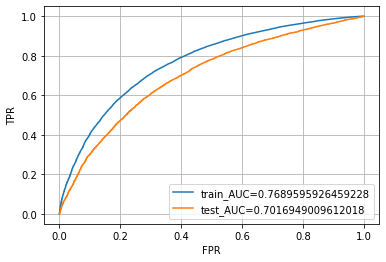

In [ ]:
# The best value of alpha corresponds to log_alpha=0 i.e. alpha=1
best_alpha = 1

# Now we are going to finally bring all the features together to have the final X_train, X_test data.
X_tr = hstack((X_train_ss_ohe,X_train_tp_ohe,X_train_pgc_ohe,X_train_tnoppp_norm,X_train_cc_ohe,X_train_csc_ohe,X_train_essay_bow,X_train_price_norm)).tocsr()
X_te = hstack((X_test_ss_ohe, X_test_tp_ohe,X_test_pgc_ohe,X_test_tnoppp_norm,X_test_cc_ohe,X_test_csc_ohe,X_test_essay_bow,X_test_price_norm)).tocsr()


# Train the Naive Bayes model with the best hyperparameters
clf = MultinomialNB(alpha=1)
clf.fit(X_tr,y_train)

# Now predict the "probabiltiy scores" for the train and test data and then plot the ROC curve
y_train_pred = clf.predict_proba(X_tr)
y_train_pred_1 = y_train_pred[:,1]    # Storing the probabilities for class 1 only
y_test_pred = clf.predict_proba(X_te)
y_test_pred_1 = y_test_pred[:,1]      # Storing the probabilities for class 1 only

# ROC curve - For this we need fpr, tpr values

fpr_train,tpr_train, tr_thresholds = roc_curve(y_train, y_train_pred_1)
fpr_test,tpr_test, te_thresholds = roc_curve(y_test, y_test_pred_1)

# Plot the ROC curve
plt.plot(fpr_train, tpr_train, label="train_AUC="+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_test, tpr_test, label="test_AUC="+str(auc(fpr_test, tpr_test)))
plt.legend()
plt.xlabel('FPR')
plt.ylabel("TPR")
plt.grid()
plt.show();

In [ ]:
# TEST AUC score when BoW vectorization is used
bow_auc = auc(fpr_test, tpr_test)

In [ ]:
# Now find and plot the confusion matrix: For this we first need to find the best threshold for which the tpr*(1-fpr) is high

# We will create a function which gives us the best threshold
def find_best_threshold(threshold,fpr,tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    print("The maximum values of tpr*(1-fpr)",max(tpr*(1-fpr)), "for thresold", np.round(t,3))
    return t

# This function will predict the class labels for a given(best) threshold
def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)            
    return predictions

In [ ]:

# Here we are storing the best thresold value
best_t = find_best_threshold(tr_thresholds, fpr_train, tpr_train)

# Use the best threshold value to predict the train data points and print the confusion matrix
print("Train Confusion Matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred_1, best_t)))

# Similarly use the best threshold value to predict the train data points and print the confusion matrix
print("Test Confusion Matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred_1, best_t)))

The maximum values of tpr*(1-fpr) 0.4961224042727509 for thresold 0.858
Train Confusion Matrix
[[ 8229  3350]
 [19592 45302]]
Test Confusion Matrix
[[ 3114  1849]
 [ 8944 18868]]


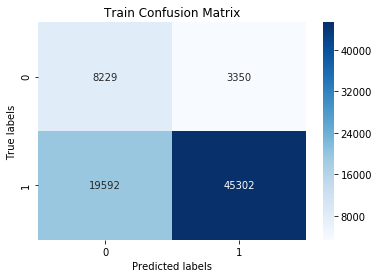

In [ ]:
# Reference : https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor

# Store the confusion matrix and use it to plot the heatmap
cm=confusion_matrix(y_train, predict_with_best_t(y_train_pred_1, best_t))

ax= plt.subplot();
sns.heatmap(cm, annot=True,cmap='Blues',ax=ax,fmt='d');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Train Confusion Matrix');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);

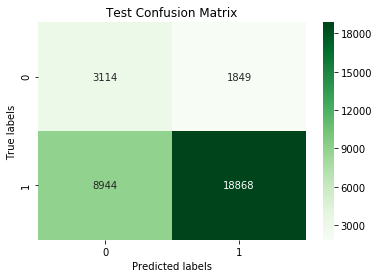

In [ ]:
# Reference: https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor

# Store the confusion matrix and use it to plot the heatmap
cm=confusion_matrix(y_test, predict_with_best_t(y_test_pred_1, best_t))

ax= plt.subplot();
sns.heatmap(cm, annot=True,cmap='Greens',ax=ax,fmt='d');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Test Confusion Matrix');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);

#### 1.5.1.1 Get Top-features for BoW implemented NB

In [ ]:
# Creating an empty list to store the feature names: The order of the features are as follows:
# X_train_ss_ohe,X_train_tp_ohe,X_train_pgc_ohe,X_train_tnoppp_norm,X_train_cc_ohe,X_train_csc_ohe,X_train_essay_bow,
# X_train_price_norm
l = list()

# Adding the feature names sequentially
l.extend(ss.get_feature_names())
l.extend(tp.get_feature_names())
l.extend(pgc.get_feature_names())
l.extend(['teacher_number_of_previously_posted_projects'])
l.extend(cc.get_feature_names())
l.extend(csc.get_feature_names())
l.extend(bow.get_feature_names())
l.extend(['price'])

In [ ]:
# Now find the top 20 features for positive and negative classes
feature_log_proba_class0 = clf.feature_log_prob_[0]
feature_log_proba_class1 = clf.feature_log_prob_[1]

#### Top features for the positive class

In [ ]:
# Now we need to perform an argsort for the positive class
class1_feature_indices = np.argsort(feature_log_proba_class1)[::-1]
for pos,i in enumerate(class1_feature_indices[:20]):
    print(f'{pos+1}. {l[i]}')

1. students
2. school
3. my
4. learning
5. classroom
6. the
7. they
8. not
9. learn
10. help
11. many
12. nannan
13. we
14. need
15. work
16. reading
17. use
18. love
19. day
20. able


#### Top features for the negative class

In [ ]:
# Now we need to perform an argsort for the negative class
class0_feature_indices = np.argsort(feature_log_proba_class0)[::-1]
for pos,i in enumerate(class0_feature_indices[:20]):
    print(f'{pos+1}. {l[i]}')

1. students
2. school
3. learning
4. my
5. classroom
6. not
7. learn
8. they
9. help
10. the
11. nannan
12. many
13. we
14. need
15. work
16. come
17. love
18. able
19. skills
20. reading


## 1.5.2 Naive Bayes - TFIDF_essay + other features

### 1.5.2.1 Find the best alpha for MultinomialNB

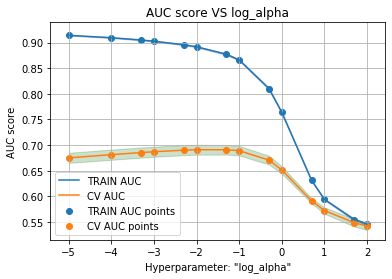

In [ ]:
# Stack all the train and test features into one variable and convert it to a sparse matrix
X_tr = hstack((X_train_ss_ohe, X_train_tp_ohe, X_train_pgc_ohe, X_train_tnoppp_norm, X_train_cc_ohe, X_train_csc_ohe,X_train_essay_tfidf, X_train_price_norm)).tocsr()
X_te = hstack((X_test_ss_ohe, X_test_tp_ohe, X_test_pgc_ohe, X_test_tnoppp_norm, X_test_cc_ohe, X_test_csc_ohe,X_test_essay_tfidf, X_test_price_norm)).tocsr()

# Applying NaiveBayes algorithm
nb = MultinomialNB(class_prior=None)
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

# using grid search to find the best hyperparameter
clf = GridSearchCV(nb, parameters, cv=5, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr, y_train)

# Store the results in a dataframe
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

# converting alphas to log space for easy visualization
alpha = np.log10(results['param_alpha'].apply(float)).values
train_auc = results['mean_train_score']
train_auc_std = results['std_train_score']
cv_auc = results['mean_test_score']
cv_auc_std = results['std_test_score']


# plot the Train and CV AUC score
plt.plot(alpha, train_auc, label='TRAIN AUC')
plt.gca().fill_between(alpha, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')


plt.plot(alpha, cv_auc, label='CV AUC')
plt.gca().fill_between(alpha, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkgreen')

plt.scatter(alpha, train_auc, label='TRAIN AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')
plt.grid()
plt.legend()
plt.xlabel('Hyperparameter: "log_alpha"')
plt.ylabel('AUC score')
plt.title('AUC score VS log_alpha')
plt.show();

### 1.5.2.2 Train Using the best alpha

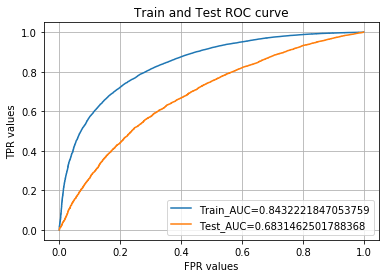

In [ ]:
# The best value of alpha corresponds to log_alpha=-1 i.e. alpha=0.1
best_alpha = 0.1

# Append all the features together
X_tr = hstack((X_train_ss_ohe, X_train_tp_ohe, X_train_pgc_ohe, X_train_tnoppp_norm, X_train_cc_ohe, X_train_csc_ohe,X_train_essay_tfidf, X_train_price_norm)).tocsr()
X_te = hstack((X_test_ss_ohe, X_test_tp_ohe, X_test_pgc_ohe, X_test_tnoppp_norm, X_test_cc_ohe, X_test_csc_ohe,X_test_essay_tfidf, X_test_price_norm)).tocsr()

# Fit the data into the model
clf = MultinomialNB(alpha=best_alpha)
clf.fit(X_tr, y_train)

# Predict on behalf of the fitted data
y_train_pred = clf.predict_proba(X_tr)
y_train_pred_1 = y_train_pred[:,1]
y_test_pred = clf.predict_proba(X_te)
y_test_pred_1 = y_test_pred[:,1]

# Find the fpr, tpr values
fpr_train, tpr_train, tr_thresholds = roc_curve(y_train, y_train_pred_1)
fpr_test, tpr_test, te_thresholds = roc_curve(y_test, y_test_pred_1)

# Plot the ROC curve
plt.plot(fpr_train, tpr_train, label='Train_AUC='+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_test, tpr_test, label='Test_AUC='+str(auc(fpr_test, tpr_test)))
plt.legend()
plt.grid()
plt.xlabel('FPR values')
plt.ylabel('TPR values')
plt.title('Train and Test ROC curve')
plt.show();

In [ ]:
# TEST AUC score when tfidf vectorization is used
tfidf_auc = auc(fpr_test, tpr_test)

In [ ]:
# Find the best threshold and then use it to predict the class labels
best_t = find_best_threshold(tr_thresholds, fpr_train, tpr_train)


# Use the best threshold value to predict the train data points and print the confusion matrix
print("Train Confusion Matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred_1, best_t)))

# Similarly use the best threshold value to predict the train data points and print the confusion matrix
print("Test Confusion Matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred_1, best_t)))

The maximum values of tpr*(1-fpr) 0.5808936519896326 for thresold 0.848
Train Confusion Matrix
[[ 8965  2614]
 [16206 48688]]
Test Confusion Matrix
[[ 2713  2250]
 [ 7979 19833]]


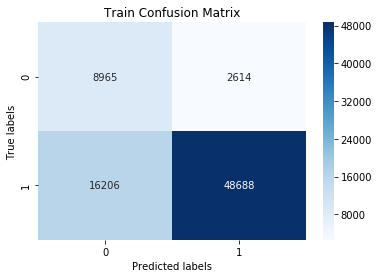

In [ ]:
# Store the confusion matrix and use it to plot the heatmap
cm=confusion_matrix(y_train, predict_with_best_t(y_train_pred_1, best_t))

ax= plt.subplot();
sns.heatmap(cm, annot=True,cmap='Blues',ax=ax,fmt='d');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Train Confusion Matrix');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);

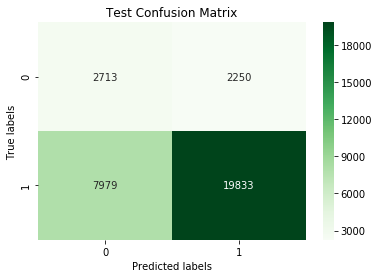

In [ ]:
cm=confusion_matrix(y_test, predict_with_best_t(y_test_pred_1, best_t))

ax= plt.subplot();
sns.heatmap(cm, annot=True,cmap='Greens',ax=ax,fmt='d');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Test Confusion Matrix');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);

#### 1.5.2.1 Get top most features for TFIDF applied NB

In [ ]:
# Creating an empty list to store the feature names: The order of the features are as follows:
# X_train_ss_ohe, X_train_tp_ohe, X_train_pgc_ohe, X_train_tnoppp_norm, X_train_cc_ohe, X_train_csc_ohe,X_train_essay_tfidf,
# X_train_price_norm
l = list()

In [ ]:
# Adding the feature names sequentially

l.extend(ss.get_feature_names())
l.extend(tp.get_feature_names())
l.extend(pgc.get_feature_names())
l.extend(['teacher_number_of_previously_posted_projects'])
l.extend(cc.get_feature_names())
l.extend(csc.get_feature_names())
l.extend(tfidf.get_feature_names())
l.extend(['price'])


In [ ]:
# Now find the top 20 features for positive and negative classes
feature_log_proba_class0 = clf.feature_log_prob_[0]
feature_log_proba_class1 = clf.feature_log_prob_[1]

#### Top 20 features for the positive class

In [ ]:
# Now we need to perform an argsort for the positive class
class1_feature_indices = np.argsort(feature_log_proba_class1)[::-1]
for pos,i in enumerate(class1_feature_indices[:20]):
    print(f'{pos+1}. {l[i]}')

1. mrs
2. literacy_language
3. grades_prek_2
4. math_science
5. ms
6. grades_3_5
7. literacy
8. mathematics
9. literature_writing
10. grades_6_8
11. ca
12. health_sports
13. specialneeds
14. specialneeds
15. appliedlearning
16. grades_9_12
17. mr
18. appliedsciences
19. health_wellness
20. music_arts


#### Top 20 features for the Negative class

In [ ]:
# Now we need to perform an argsort for the positive class
class0_feature_indices = np.argsort(feature_log_proba_class0)[::-1]
for pos,i in enumerate(class0_feature_indices[:20]):
    print(f'{pos+1}. {l[i]}')

1. mrs
2. literacy_language
3. grades_prek_2
4. math_science
5. ms
6. grades_3_5
7. literacy
8. mathematics
9. literature_writing
10. grades_6_8
11. specialneeds
12. specialneeds
13. ca
14. health_sports
15. appliedlearning
16. appliedsciences
17. grades_9_12
18. mr
19. music_arts
20. tx


<h1>3. Summary</h1>


In [ ]:
x = PrettyTable()
x = PrettyTable(["Vectorizer", "Model", "Hyper-parameter", "AUC"])

row = ['BoW', 'Multinomial Naive Bayes', 'ngram_range=(1,1),max_features=15k,alpha=1', bow_auc]
x.add_row(row)

row = ['TFIDF', 'Multinomial Naive Bayes', 'ngram_range=(1,2),max_features=75k,alpha=0.1', tfidf_auc]
x.add_row(row)

print(x)

+------------+-------------------------+----------------------------------------------+--------------------+
| Vectorizer |          Model          |               Hyper-parameter                |        AUC         |
+------------+-------------------------+----------------------------------------------+--------------------+
|    BoW     | Multinomial Naive Bayes |  ngram_range=(1,1),max_features=15k,alpha=1  | 0.7045663329318679 |
|   TFIDF    | Multinomial Naive Bayes | ngram_range=(1,2),max_features=75k,alpha=0.1 | 0.6923331893752876 |
+------------+-------------------------+----------------------------------------------+--------------------+
